<a href="https://colab.research.google.com/github/nyla-bhargava/Brain_Tumour_Detection/blob/main/CNN_to_Classify_BrainTumours.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**CNN for Brain Tumor Classifications in MRIs**

In this project, a Convolutional Neural Network (CNN) is created to perform classification between 4 different classes of brain tumors through their MRI images: gliomas, meningiomas, pituitary and no-tumors. Using dataset from Kaggle with 5,712 images to train the model and 1,311 images to later test it.

In [6]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [7]:
IMAGE_SIZE = (150, 150)
BATCH_SIZE = 32
EPOCHS = 5

In [9]:
from google.colab import files
uploaded = files.upload()

Saving archive.zip to archive.zip


In [10]:
!unzip archive.zip -d /content/

Streaming output truncated to the last 5000 lines.
  inflating: /content/Training/glioma/Tr-gl_0712.jpg  
  inflating: /content/Training/glioma/Tr-gl_0713.jpg  
  inflating: /content/Training/glioma/Tr-gl_0714.jpg  
  inflating: /content/Training/glioma/Tr-gl_0715.jpg  
  inflating: /content/Training/glioma/Tr-gl_0716.jpg  
  inflating: /content/Training/glioma/Tr-gl_0717.jpg  
  inflating: /content/Training/glioma/Tr-gl_0718.jpg  
  inflating: /content/Training/glioma/Tr-gl_0719.jpg  
  inflating: /content/Training/glioma/Tr-gl_0720.jpg  
  inflating: /content/Training/glioma/Tr-gl_0721.jpg  
  inflating: /content/Training/glioma/Tr-gl_0722.jpg  
  inflating: /content/Training/glioma/Tr-gl_0723.jpg  
  inflating: /content/Training/glioma/Tr-gl_0724.jpg  
  inflating: /content/Training/glioma/Tr-gl_0725.jpg  
  inflating: /content/Training/glioma/Tr-gl_0726.jpg  
  inflating: /content/Training/glioma/Tr-gl_0727.jpg  
  inflating: /content/Training/glioma/Tr-gl_0728.jpg  
  inflating: /

In [11]:
train_dir = "/content/Training"
test_dir = "/content/Testing"

In [12]:
train_data_generator = ImageDataGenerator(rescale=1./255)
train_generator = train_data_generator.flow_from_directory(
        train_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

test_data_generator = ImageDataGenerator(rescale=1./255)
test_generator = test_data_generator.flow_from_directory(
        test_dir,
        target_size=IMAGE_SIZE,
        batch_size=BATCH_SIZE,
        class_mode='categorical')

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [13]:
print(train_generator.class_indices)
print(test_generator.class_indices)

{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}
{'glioma': 0, 'meningioma': 1, 'notumor': 2, 'pituitary': 3}


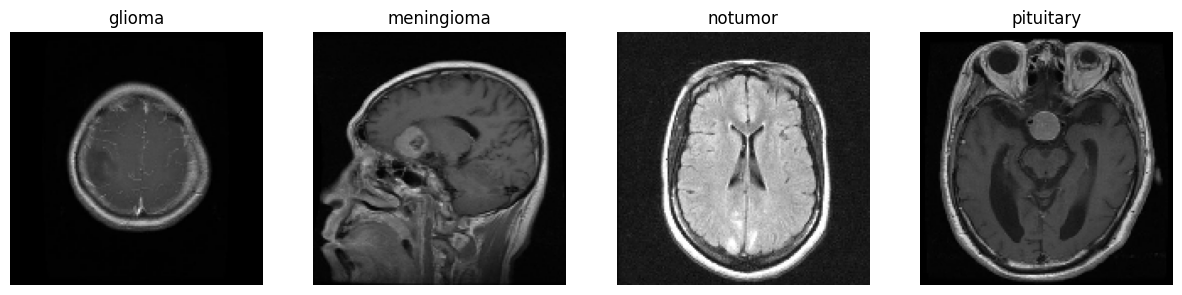

In [14]:
# Show sample images from each class
import matplotlib.pyplot as plt
batch = next(train_generator)

class_indices = train_generator.class_indices
class_idx_to_sample = {}
for class_name, class_idx in class_indices.items():
    class_idx_to_sample[class_idx] = [i for i, label in enumerate(batch[1]) if label[class_idx] == 1][0]

fig, axs = plt.subplots(1, len(class_indices), figsize=(15, 5))
for class_idx, ax in zip(range(len(class_indices)), axs):
    image = batch[0][class_idx_to_sample[class_idx]]
    class_name = list(class_indices.keys())[class_idx]
    ax.imshow(image)
    ax.axis('off')
    ax.set_title(class_name)
plt.show()

In [15]:
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(4, activation='softmax'))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Evaluation Metrics: Cross-entropy Loss Function & Adam Optimizer

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(
        train_generator,
        steps_per_epoch=train_generator.n // BATCH_SIZE,
        epochs=EPOCHS,
        validation_data=test_generator,
        validation_steps=test_generator.n // BATCH_SIZE)

Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


178/178 ━━━━━━━━━━━━━━━━━━━━ 192s 1s/step - accuracy: 0.6306 - loss: 0.9075 - val_accuracy: 0.8664 - val_loss: 0.3581
Epoch 2/5
  1/178 ━━━━━━━━━━━━━━━━━━━━ 2:35 879ms/step - accuracy: 0.8125 - loss: 0.3958

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/epoch_iterator.py:116: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self._interrupted_warning()


178/178 ━━━━━━━━━━━━━━━━━━━━ 14s 72ms/step - accuracy: 0.8125 - loss: 0.3958 - val_accuracy: 0.8633 - val_loss: 0.3618
Epoch 3/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 264s 1s/step - accuracy: 0.9142 - loss: 0.2427 - val_accuracy: 0.8547 - val_loss: 0.4150
Epoch 4/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 14s 73ms/step - accuracy: 0.9375 - loss: 0.3456 - val_accuracy: 0.8617 - val_loss: 0.3968
Epoch 5/5
178/178 ━━━━━━━━━━━━━━━━━━━━ 191s 1s/step - accuracy: 0.9614 - loss: 0.1159 - val_accuracy: 0.9398 - val_loss: 0.1750


In [17]:
# Evaluate model on test data
loss, accuracy = model.evaluate(test_generator)

# Print accuracy
print('Accuracy on Test Data:', accuracy)

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step - accuracy: 0.9423 - loss: 0.1767
Accuracy on Test Data: 0.9397406578063965


In [18]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

# Generate predicted labels for test data
y_pred = model.predict(test_generator)
y_pred = np.argmax(y_pred, axis=1)

# Generate true labels for test data
y_true = test_generator.classes

cm = confusion_matrix(y_true, y_pred)
cr = classification_report(y_true, y_pred)

print(cm)
print(cr)

41/41 ━━━━━━━━━━━━━━━━━━━━ 13s 324ms/step
[[ 63  74  87  76]
 [ 80  64  97  65]
 [ 83  96 132  94]
 [ 70  67  97  66]]
              precision    recall  f1-score   support

           0       0.21      0.21      0.21       300
           1       0.21      0.21      0.21       306
           2       0.32      0.33      0.32       405
           3       0.22      0.22      0.22       300

    accuracy                           0.25      1311
   macro avg       0.24      0.24      0.24      1311
weighted avg       0.25      0.25      0.25      1311



In [19]:
# Finding class with highest diagonal value in confusion matrix
best_class_cm = np.argmax(np.diagonal(cm))
class_cm = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(best_class_cm)]
print("Best Classification according to Confusion Matrix: ", class_cm)

# Finding class with highest F1-Score
report_lines = cr.split('\n')
f1_scores = []

for line in report_lines:
    parts = line.split()
    if len(parts) > 1 and parts[0].isdigit():
        f1_score = float(parts[-2])
        f1_scores.append(f1_score)

best_class_cr = f1_scores.index(max(f1_scores))
class_cr = list(test_generator.class_indices.keys())[list(test_generator.class_indices.values()).index(best_class_cr)]
print("Class with Highest F1-Score: ", class_cr)

Best Classification according to Confusion Matrix:  notumor
Class with Highest F1-Score:  notumor


In [20]:
# 1. Save model explicitly to /content
model.save("/content/model.h5")

# 2. Verify file is created
import os
print("Files in /content:", os.listdir("/content"))

# 3a. Option A: Download to local
from google.colab import files
files.download("/content/model.h5")

Files in /content: ['.config', 'archive.zip', 'Testing', 'model.h5', 'Training', 'sample_data']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>